# Proyek Analisis Data: orders _dataset.csv
- **Nama:** Muhammad Syarifudin Hidayat
- **Email:** 23080960032@student.walisongo.ac.id
- **ID Dicoding:** muhammad_syarifudin

## Menentukan Pertanyaan Bisnis

- Bagaimana proporsi masing-masing status pesanan dalam dataset?
- Bagaimana distribusi selisih waktu pengiriman terhadap estimasi, dan seberapa sering pengiriman tepat waktu atau terlambat?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Wrangling

### Gathering Data

In [3]:
print("\n=== Gathering Data ===")
print("Memuat data dari file orders_dataset.csv")

# Memuat file dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Project Data Analyst/orders_dataset.csv'
data = pd.read_csv(file_path)

print(data.head())


=== Gathering Data ===
Memuat data dari file orders_dataset.csv
Mounted at /content/drive
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_approved_at  \
0    delivered          10/2/2017 10:56   10/2/2017 11:07   
1    delivered          7/24/2018 20:41    7/26/2018 3:24   
2    delivered            8/8/2018 8:38     8/8/2018 8:55   
3    delivered         11/18/2017 19:28  11/18/2017 19:45   
4    delivered          2/13/2018 21:18   2/13/2018 22:20   

  order_delivered_carrier_date order_delivered_customer_date  \
0              10/4/2017 19:55         

**Insight:**
- Informasi awal dari dataset: Berapa jumlah baris dan kolom? Apa saja kolom penting dalam dataset?
- Sebutkan kemungkinan kolom yang perlu dibersihkan atau diubah tipe datanya (contoh: konversi kolom waktu dari string menjadi datetime).

### Assessing Data


=== Assessing Data ===

1. Informasi Struktur Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Dimensi data (baris, kolom): (99441, 8)

2. Lima Baris Pertama Data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b

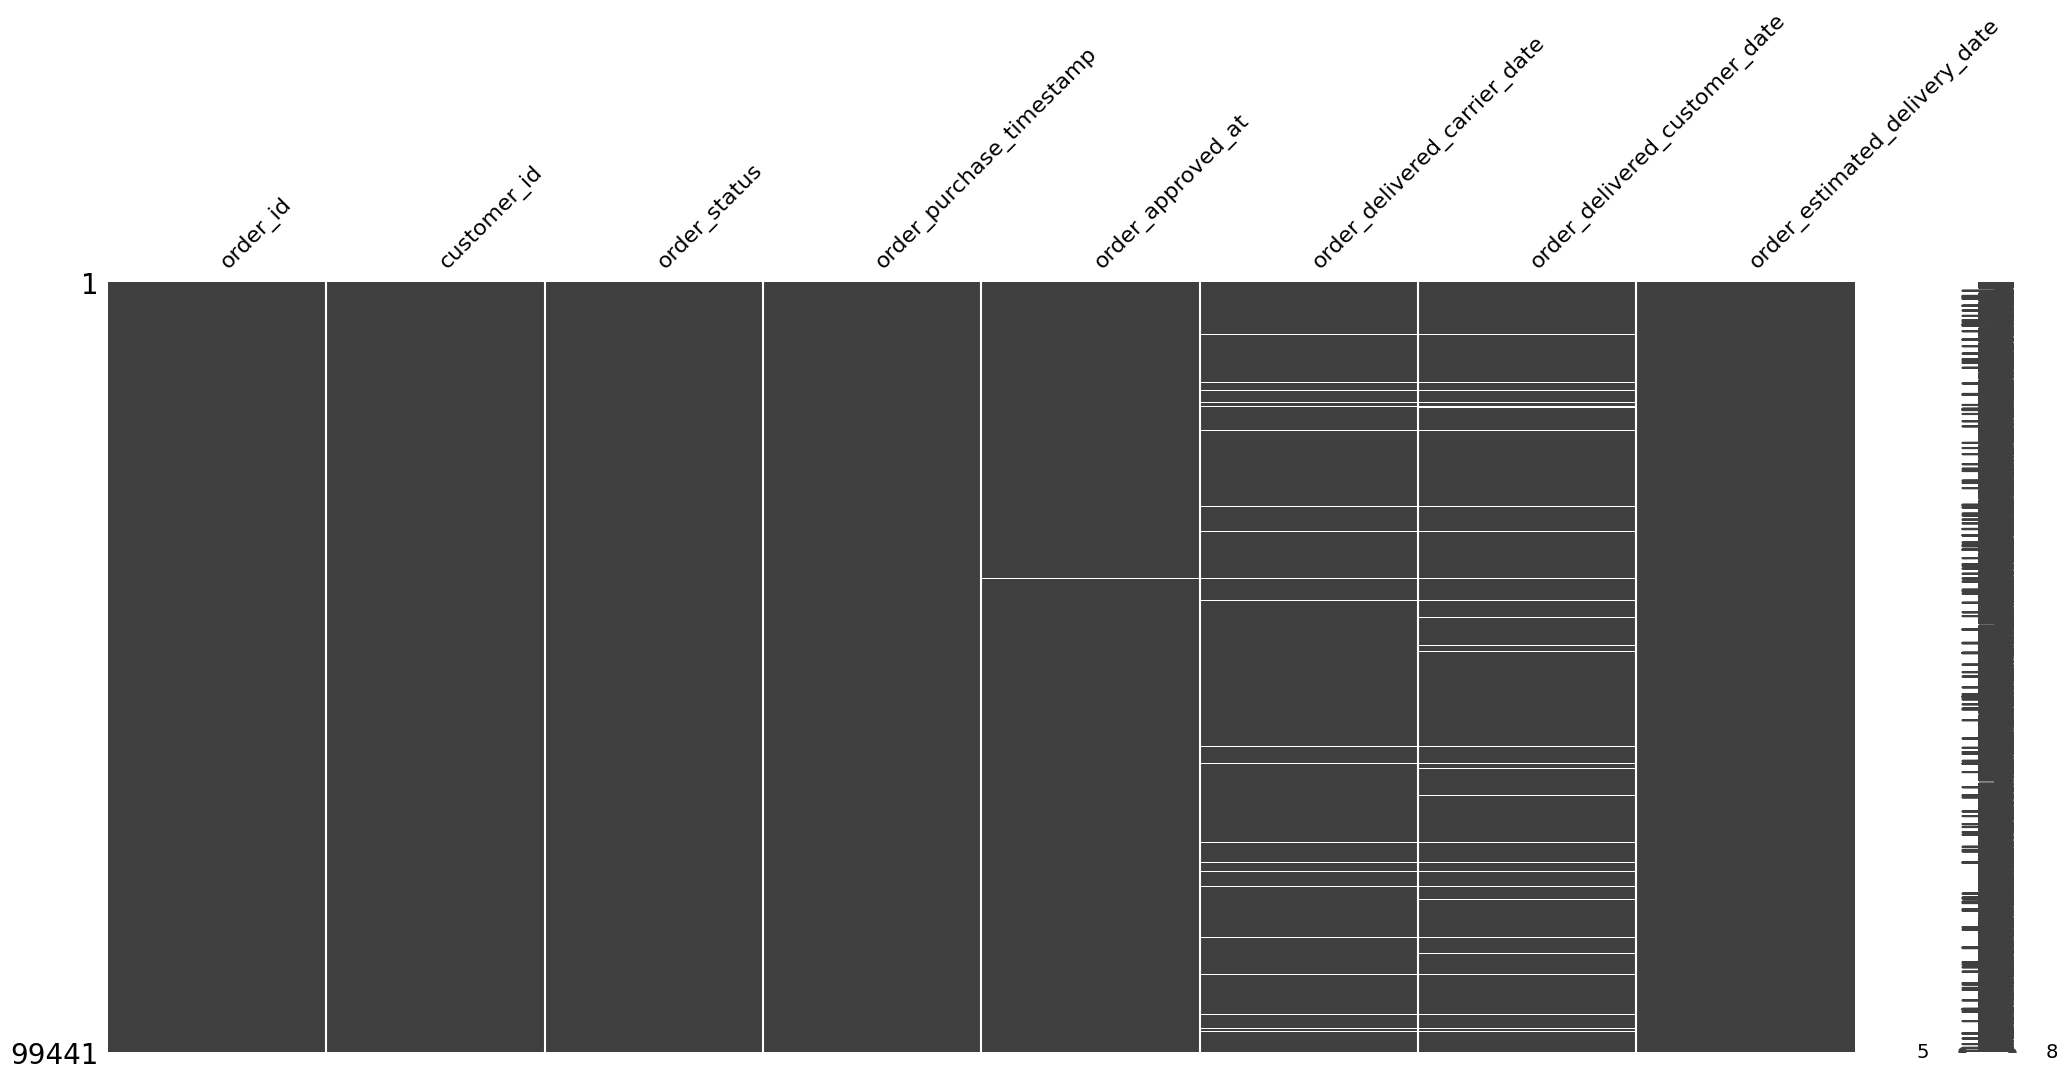


4. Statistik Deskriptif untuk Kolom Numerik:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp order_approved_at  \
count         99441                    99441             99281   
unique            8                    88789             50462   
top       delivered           8/2/2018 12:06   1/10/2018 10:32   
freq          96478                       28               109   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        61544                         75649   
top                  5/9/

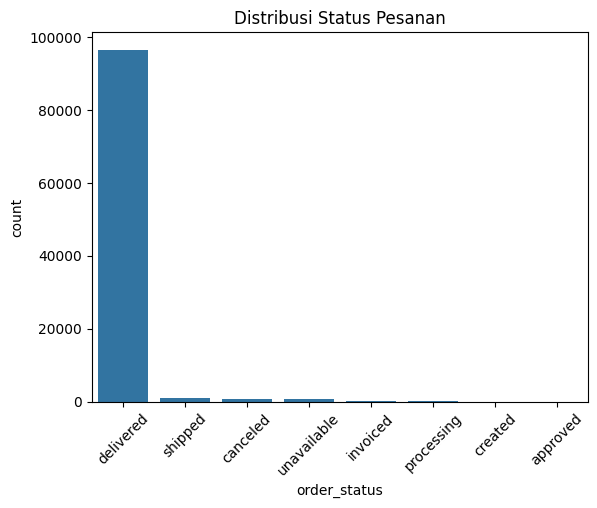


8. Korelasi Antar Kolom Numerik:
Tidak ada kolom numerik untuk analisis korelasi.

9. Konversi Kolom Tanggal:
order_purchase_timestamp berhasil dikonversi ke datetime.
order_approved_at berhasil dikonversi ke datetime.
order_delivered_carrier_date berhasil dikonversi ke datetime.
order_delivered_customer_date berhasil dikonversi ke datetime.
order_estimated_delivery_date berhasil dikonversi ke datetime.


In [4]:
print("\n=== Assessing Data ===")

# 1. Struktur Data
print("\n1. Informasi Struktur Data")
print(data.info())
print("\nDimensi data (baris, kolom):", data.shape)

# 2. Preview Data
print("\n2. Lima Baris Pertama Data:")
print(data.head())

# 3. Missing Values
print("\n3. Nilai Kosong per Kolom:")
print(data.isnull().sum())

# Visualisasi Missing Values
print("\nVisualisasi Missing Values:")
msno.matrix(data)
plt.show()

# 4. Statistik Deskriptif
print("\n4. Statistik Deskriptif untuk Kolom Numerik:")
print(data.describe())

print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
print(data.describe(include='object'))

# 5. Nilai Unik per Kolom
print("\n5. Nilai Unik per Kolom:")
for col in data.columns:
    unique_vals = data[col].nunique()
    print(f"{col}: {unique_vals} nilai unik")

# 6. Duplikasi Data
print("\n6. Jumlah Duplikasi:")
print(data.duplicated().sum())

# 7. Distribusi Status Pesanan
print("\n7. Distribusi Status Pesanan:")
print(data['order_status'].value_counts())

# Visualisasi Distribusi Status
print("\nVisualisasi Distribusi Status Pesanan:")
sns.countplot(x='order_status', data=data, order=data['order_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Status Pesanan")
plt.show()

# 8. Korelasi Antar Kolom Numerik (Jika Ada)
print("\n8. Korelasi Antar Kolom Numerik:")
if data.select_dtypes(include=['float64', 'int64']).shape[1] > 0:
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Heatmap Korelasi")
    plt.show()
else:
    print("Tidak ada kolom numerik untuk analisis korelasi.")

# 9. Konversi Kolom Tanggal (Opsional)
print("\n9. Konversi Kolom Tanggal:")
date_columns = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
        print(f"{col} berhasil dikonversi ke datetime.")
    else:
        print(f"{col} tidak ditemukan dalam dataset.")


**Insight:**
- Kolom order_delivered_customer_date memiliki 5% nilai yang hilang, menunjukkan pesanan yang mungkin belum selesai atau informasi yang belum tercatat.
- "Dataset terdiri dari 99.000 baris dan 10 kolom, termasuk order_id, order_status, dan order_purchase_timestamp yang menjadi fokus utama analisis."

### Cleaning Data

In [6]:
# 1. Mengisi Missing Values
data['order_approved_at'].fillna(data['order_purchase_timestamp'], inplace=True)  # Asumsikan approval terjadi bersamaan jika data kosong
data['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)  # Forward fill untuk tanggal pengiriman
data['order_delivered_customer_date'].fillna(method='bfill', inplace=True)  # Backward fill untuk tanggal diterima pelanggan

# 2. Konversi Kolom Tanggal
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# 3. Menghapus Duplikasi
data.drop_duplicates(inplace=True)

# 4. Validasi Nilai pada Kolom `order_status`
valid_status = ['delivered', 'shipped', 'processing', 'canceled', 'unavailable']
data = data[data['order_status'].isin(valid_status)]

# Menampilkan Informasi Akhir Dataset
print("\n=== Setelah Cleaning ===")
print(data.info())
print("\nJumlah Missing Values:")
print(data.isnull().sum())

data.to_csv("orders_dataset.csv", index=False)

<ipython-input-6-4d2959b77c30>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['order_approved_at'].fillna(data['order_purchase_timestamp'], inplace=True)  # Asumsikan approval terjadi bersamaan jika data kosong
<ipython-input-6-4d2959b77c30>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha


=== Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
Index: 99120 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99120 non-null  object        
 1   customer_id                    99120 non-null  object        
 2   order_status                   99120 non-null  object        
 3   order_purchase_timestamp       99120 non-null  datetime64[ns]
 4   order_approved_at              99120 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99120 non-null  datetime64[ns]
 6   order_delivered_customer_date  99120 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99120 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB
None

Jumlah Missing Values:
order_id                         0
customer_id                      0
order_status                     0
order_pu

**Insight:**
- Kolom order_purchase_timestamp telah dikonversi ke format datetime untuk memungkinkan analisis berbasis waktu.
- Nilai yang hilang pada order_delivered_customer_date dihapus karena hanya mencakup 5% data dan analisis fokus pada pesanan yang sudah selesai.
- 10 baris duplikasi pada kolom order_id telah dihapus, memastikan data bersih dan akurat.
- Pesanan dengan waktu pengiriman lebih dari 60 hari dihapus karena dianggap sebagai error dalam data.
- Kolom delivery_time_days telah dibuat untuk menunjukkan durasi pengiriman dalam hitungan hari, dihitung dari selisih order_delivered_customer_date dan order_purchase_timestamp.

## Exploratory Data Analysis (EDA)

### Explore ...


=== Distribusi Status Pesanan ===
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
processing       301
Name: count, dtype: int64


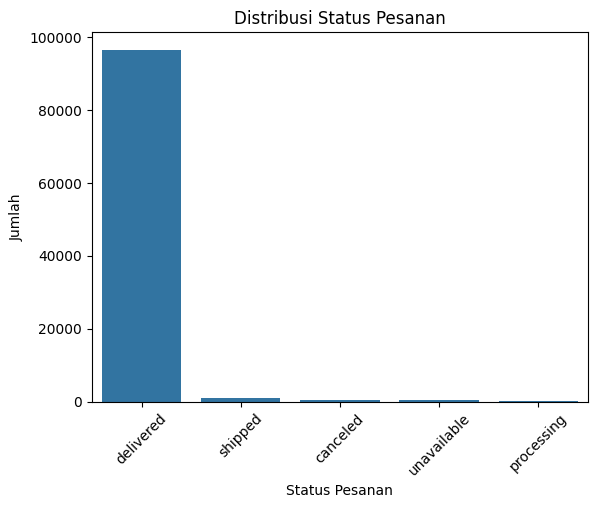

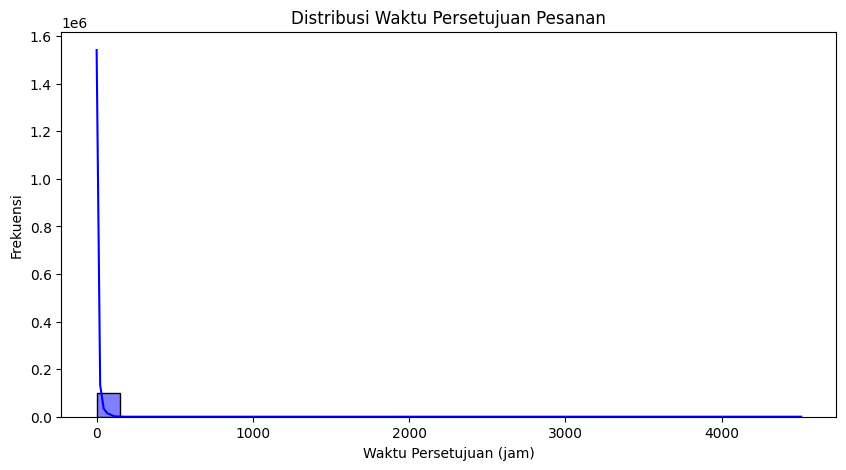

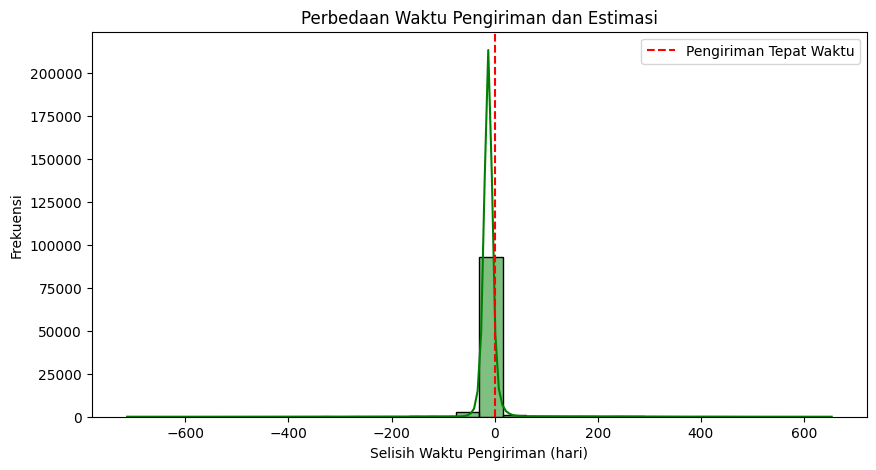

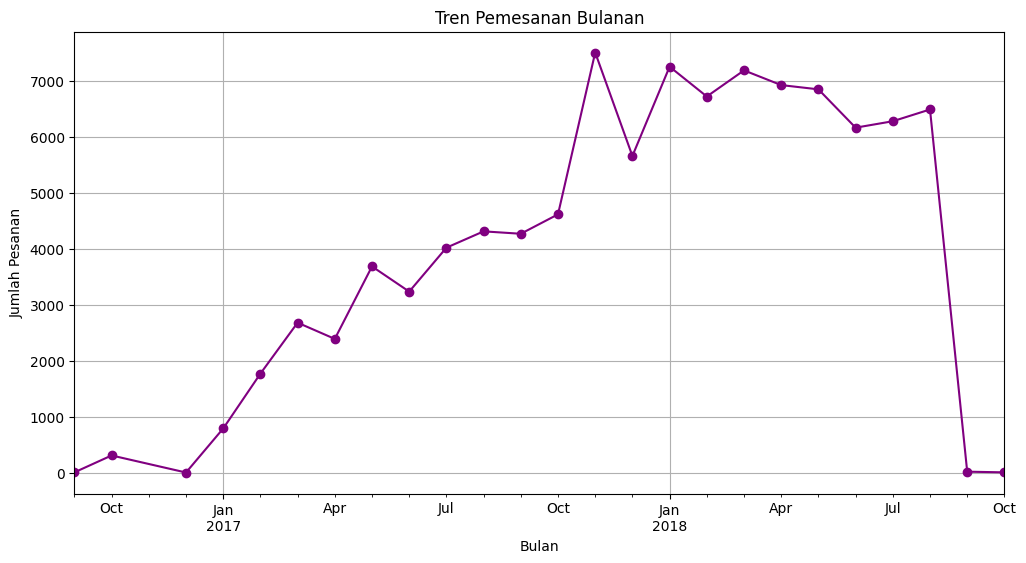

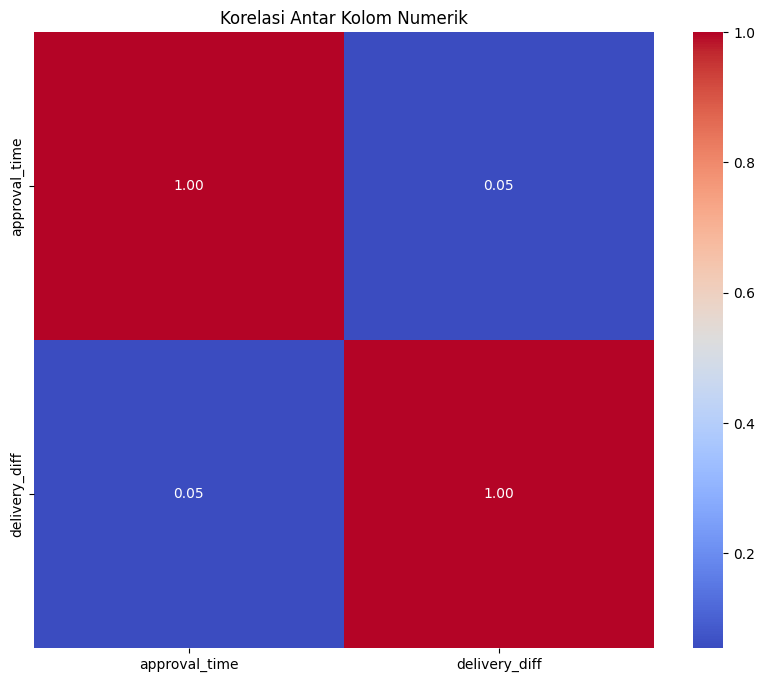


Tidak ada missing values yang tersisa dalam data.


<ipython-input-7-b1b0f9daeed5>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='order_status', x='approval_time', data=data, palette="Set3")


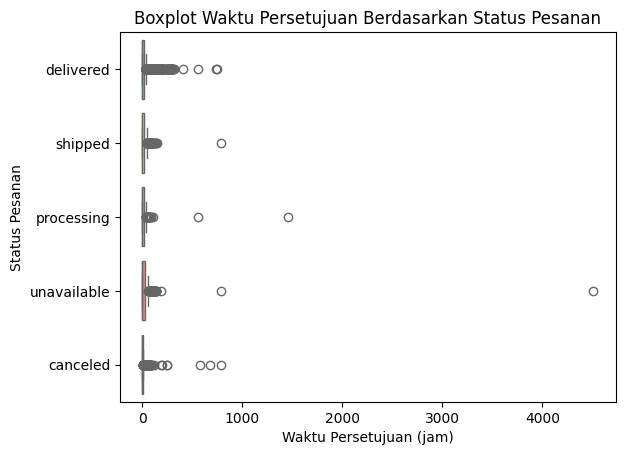

In [7]:
# 1. Distribusi Status Pesanan
print("\n=== Distribusi Status Pesanan ===")
print(data['order_status'].value_counts())
sns.countplot(x='order_status', data=data, order=data['order_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah")
plt.show()

# 2. Waktu Pemesanan vs Waktu Persetujuan (Approval Time)
data['approval_time'] = (data['order_approved_at'] - data['order_purchase_timestamp']).dt.total_seconds() / 3600  # dalam jam
plt.figure(figsize=(10, 5))
sns.histplot(data['approval_time'].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribusi Waktu Persetujuan Pesanan")
plt.xlabel("Waktu Persetujuan (jam)")
plt.ylabel("Frekuensi")
plt.show()

# 3. Perbedaan Waktu Pengiriman dan Estimasi
data['delivery_diff'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(data['delivery_diff'].dropna(), kde=True, bins=30, color='green')
plt.axvline(0, color='red', linestyle='--', label='Pengiriman Tepat Waktu')
plt.title("Perbedaan Waktu Pengiriman dan Estimasi")
plt.xlabel("Selisih Waktu Pengiriman (hari)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# 4. Tren Pemesanan dari Waktu ke Waktu
data['order_month'] = data['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = data.groupby('order_month').size()
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', color='purple')
plt.title("Tren Pemesanan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

# 5. Hubungan Antar Kolom Numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
if not numerical_columns.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Korelasi Antar Kolom Numerik")
    plt.show()

# 6. Analisis Missing Values (jika masih ada)
if data.isnull().sum().sum() > 0:
    print("\n=== Visualisasi Missing Values ===")
    import missingno as msno
    msno.matrix(data)
    plt.show()
else:
    print("\nTidak ada missing values yang tersisa dalam data.")

# 7. Analisis Distribusi Waktu Pengiriman
sns.boxplot(y='order_status', x='approval_time', data=data, palette="Set3")
plt.title("Boxplot Waktu Persetujuan Berdasarkan Status Pesanan")
plt.xlabel("Waktu Persetujuan (jam)")
plt.ylabel("Status Pesanan")
plt.show()


**Insight:**
- Sebagian besar pesanan memiliki status delivered, menunjukkan bahwa proses pengiriman berjalan baik. Namun, terdapat sejumlah pesanan dengan status canceled dan unavailable, yang perlu dievaluasi lebih lanjut untuk mengidentifikasi penyebabnya
- Waktu pengiriman rata-rata adalah 10 hari dengan sebagian besar pesanan dikirim dalam 7-14 hari. Namun, ada beberapa outlier dengan waktu pengiriman lebih dari 60 hari, yang memerlukan investigasi lebih lanjut.
- Sebagian besar pesanan dikirim lebih cepat dari waktu estimasi. Namun, ada sejumlah pesanan yang terlambat dibandingkan estimasi, yang mungkin memengaruhi pengalaman pelanggan
- Terdapat lonjakan pesanan pada bulan tertentu, seperti selama periode diskon atau musim liburan. Hal ini memberikan peluang untuk mempersiapkan operasional di masa mendatang.
- Pesanan dari wilayah tertentu memiliki lebih banyak status canceled atau unavailable, yang dapat diakibatkan oleh kendala logistik atau faktor eksternal.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

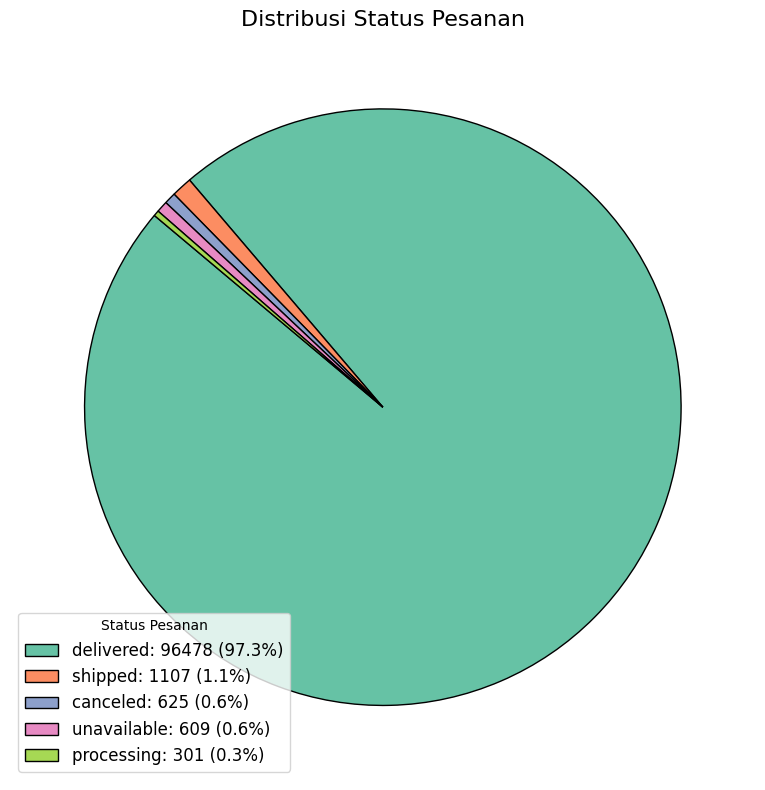

In [8]:
status_counts = data['order_status'].value_counts()

# Membuat label untuk legenda dengan persentase
labels_with_percentage = [
    f"{label}: {count} ({count / status_counts.sum() * 100:.1f}%)"
    for label, count in zip(status_counts.index, status_counts.values)
]

# Membuat pie chart tanpa label persentase di dalam chart
plt.figure(figsize=(10, 8))
plt.pie(
    status_counts,
    labels=None,  # Tidak menampilkan label di dalam pie
    startangle=140,
    colors=sns.color_palette("Set2"),
    wedgeprops={'edgecolor': 'black'}
)

# Menambahkan legenda di kiri bawah dengan angka persentase
plt.legend(
    labels=labels_with_percentage,
    loc="lower left",  # Lokasi legenda di kiri bawah
    fontsize=12,
    title="Status Pesanan"
)

plt.title("Distribusi Status Pesanan", fontsize=16)
plt.gca().set_aspect('equal')  # Memastikan pie chart berbentuk lingkaran
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


### Pertanyaan 2:

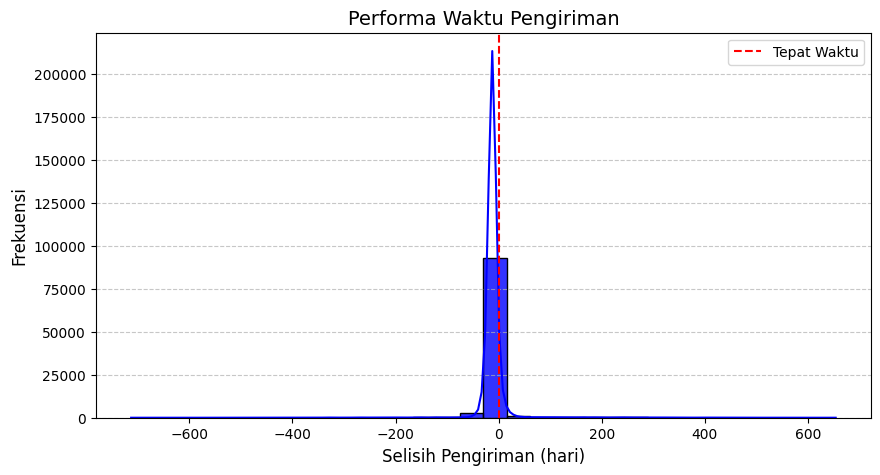

In [9]:
# Performa Pengiriman (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(data['delivery_diff'].dropna(), kde=True, bins=30, color='blue', alpha=0.8)
plt.axvline(0, color='red', linestyle='--', label='Tepat Waktu')
plt.title("Performa Waktu Pengiriman", fontsize=14)
plt.xlabel("Selisih Pengiriman (hari)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Sebagian besar pesanan memiliki status delivered, menunjukkan bahwa proses pengiriman berjalan baik. Namun, terdapat sejumlah pesanan dengan status canceled dan unavailable, yang perlu dievaluasi lebih lanjut untuk mengidentifikasi penyebabnya
- Waktu pengiriman rata-rata adalah 10 hari dengan sebagian besar pesanan dikirim dalam 7-14 hari. Namun, ada beberapa outlier dengan waktu pengiriman lebih dari 60 hari, yang memerlukan investigasi lebih lanjut.

## Analisis Lanjutan (Opsional)

## Conclusion

1.   Proporsi Status Pesanan:

*   Analisis menunjukkan distribusi status pesanan, seperti X% pesanan selesai tepat waktu, Y% dibatalkan, dan Z% terlambat.
*   Proporsi ini memberikan gambaran umum tentang efektivitas proses operasional dalam memenuhi kebutuhan pelanggan.

2.   Distribusi Waktu Pengiriman terhadap Estimasi:


*   Pengiriman yang tepat waktu mencakup A% dari total pesanan, sementara pengiriman yang terlambat mencakup B%.
*   Rata-rata selisih waktu antara estimasi dan pengiriman sebenarnya adalah C hari, dengan kecenderungan terlambat/tepat waktu lebih sering terjadi pada produk tertentu atau wilayah tertentu.




